In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [93]:
numerical = pd.read_csv("numerical.csv")
categorical = pd.read_csv("categorical.csv")
data = pd.concat([categorical, numerical],axis=1)

In [94]:
data

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,...,Vehicle Size,Unnamed: 0,customer__lifetime__value,income,monthly__premium__auto,months__since__last__claim,months__since__policy__inception,number_of__open__complaints,number_of__policies,total__claim__amount
0,BU,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,...,Medsize,0,2763.519279,56274,69,32,5,0,1,384.811147
1,QZ,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,...,Medsize,1,6979.535903,0,94,13,42,0,8,1131.464935
2,AI,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,...,Medsize,2,12887.431650,48767,108,18,38,0,2,566.472247
3,WW,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,...,Medsize,3,7645.861827,0,106,18,65,0,7,529.881344
4,HB,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,...,Medsize,4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,...,Medsize,9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,PK,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,...,Medsize,9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,TD,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,...,Medsize,9131,8163.890428,0,85,9,37,3,2,790.784983
9132,UP,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,...,Large,9132,7524.442436,21941,96,34,3,0,3,691.200000


In [95]:
data = data.drop(['Unnamed: 0'],axis = 1, inplace = False)
data = data.drop(['Customer'], axis = 1, inplace = False)

In [96]:
(data.isna().sum()/len(data)).sort_values(ascending = False)

State                               0.0
Response                            0.0
number_of__policies                 0.0
number_of__open__complaints         0.0
months__since__policy__inception    0.0
months__since__last__claim          0.0
monthly__premium__auto              0.0
income                              0.0
customer__lifetime__value           0.0
Vehicle Size                        0.0
Vehicle Class                       0.0
Sales Channel                       0.0
Renew Offer Type                    0.0
Policy                              0.0
Policy Type                         0.0
Marital Status                      0.0
Location Code                       0.0
Gender                              0.0
EmploymentStatus                    0.0
Education                           0.0
Coverage                            0.0
total__claim__amount                0.0
dtype: float64

In [97]:
data.dtypes

State                                object
Response                             object
Coverage                             object
Education                            object
EmploymentStatus                     object
Gender                               object
Location Code                        object
Marital Status                       object
Policy Type                          object
Policy                               object
Renew Offer Type                     object
Sales Channel                        object
Vehicle Class                        object
Vehicle Size                         object
customer__lifetime__value           float64
income                                int64
monthly__premium__auto                int64
months__since__last__claim            int64
months__since__policy__inception      int64
number_of__open__complaints           int64
number_of__policies                   int64
total__claim__amount                float64
dtype: object

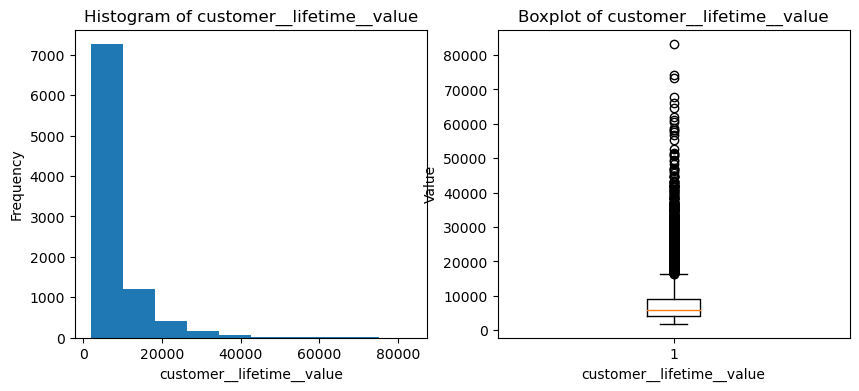

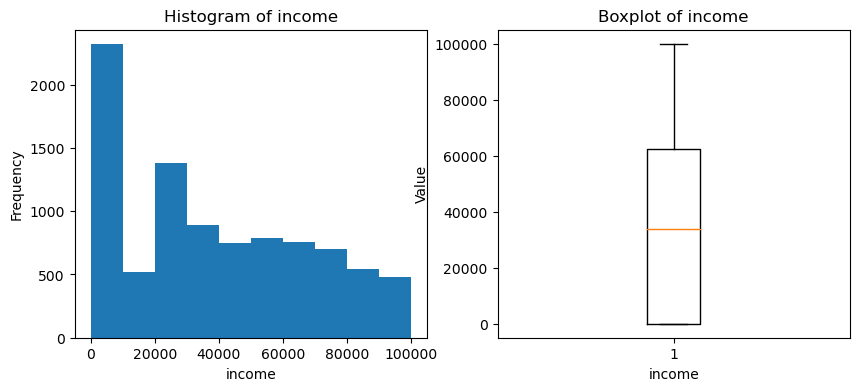

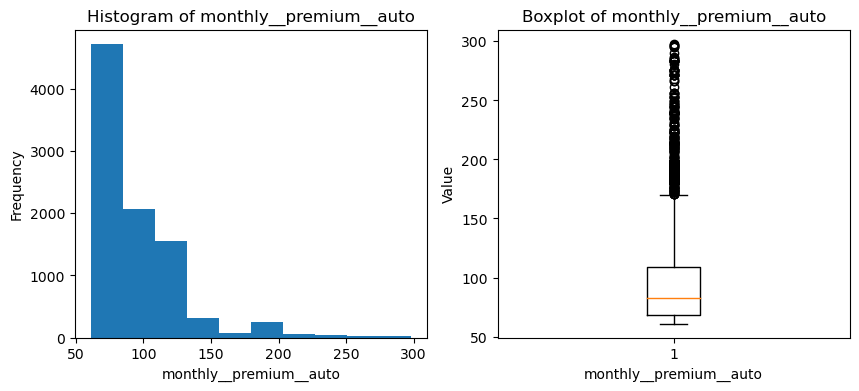

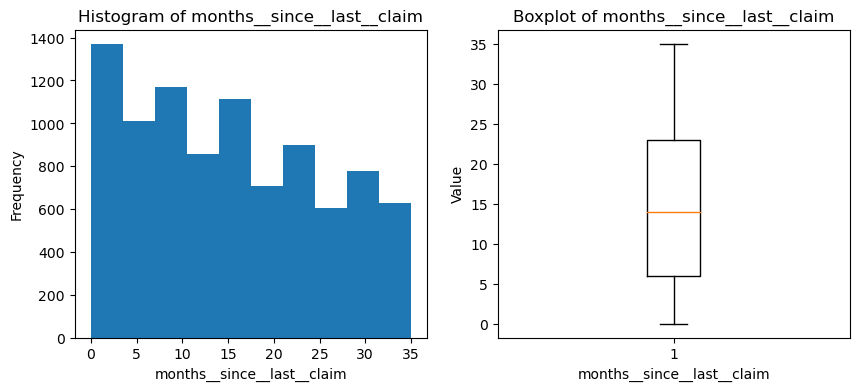

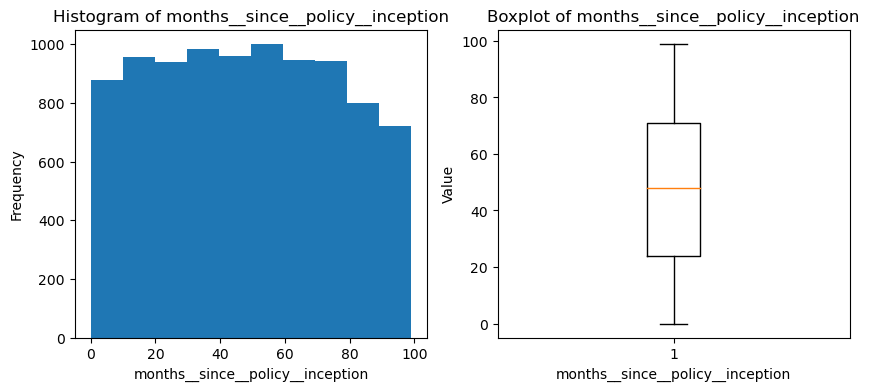

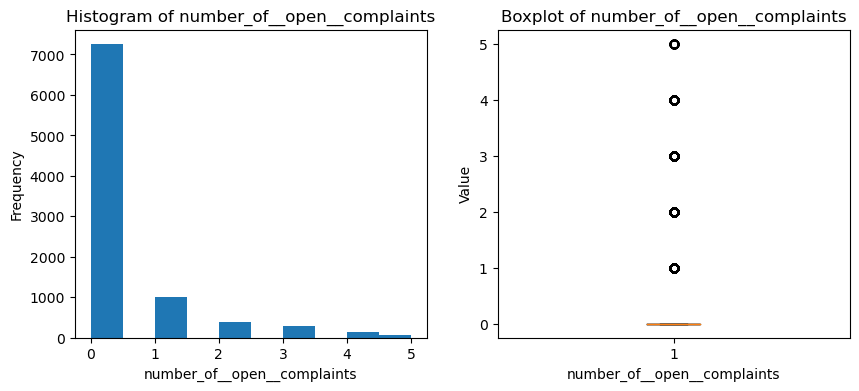

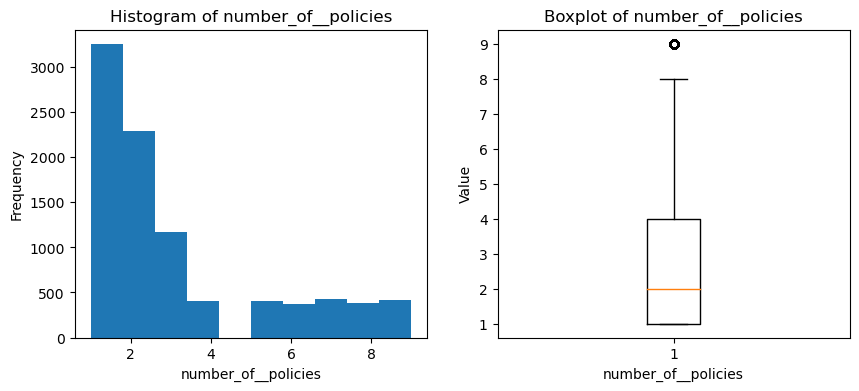

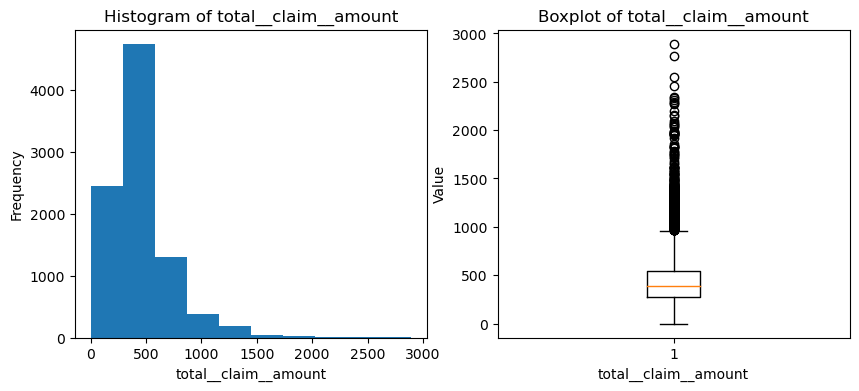

In [98]:
def plot_histboxplot(data):
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:
            fig, ax = plt.subplots(1, 2, figsize=(10, 4))
            ax[0].hist(data[col], bins=10)
            ax[0].set_xlabel(col)
            ax[0].set_ylabel('Frequency')
            ax[0].set_title('Histogram of {}'.format(col))

            ax[1].boxplot(data[col])
            ax[1].set_xlabel(col)
            ax[1].set_ylabel('Value')
            ax[1].set_title('Boxplot of {}'.format(col))

            plt.show()
            
plot_histboxplot(data)

In [99]:
columns_outliers = ["customer__lifetime__value","monthly__premium__auto"]

def remove(data, columns_outliers):
    for col in columns_outliers:
        iqr = np.percentile(data[col],75) - np.percentile(data[col],25)
        upper_limit = np.percentile(data[col],75) + 1.5 * iqr
        data = data[data[col] < upper_limit]
    return data

data = remove(data,columns_outliers).reset_index()

In [100]:
y = data["total__claim__amount"]
data = data.drop(["total__claim__amount"],axis=1)

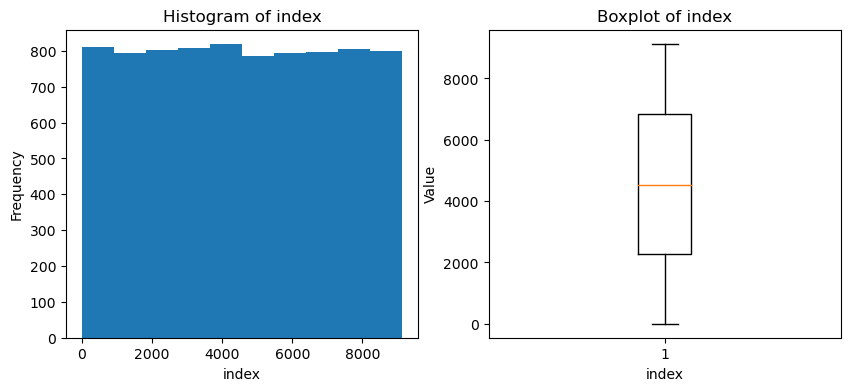

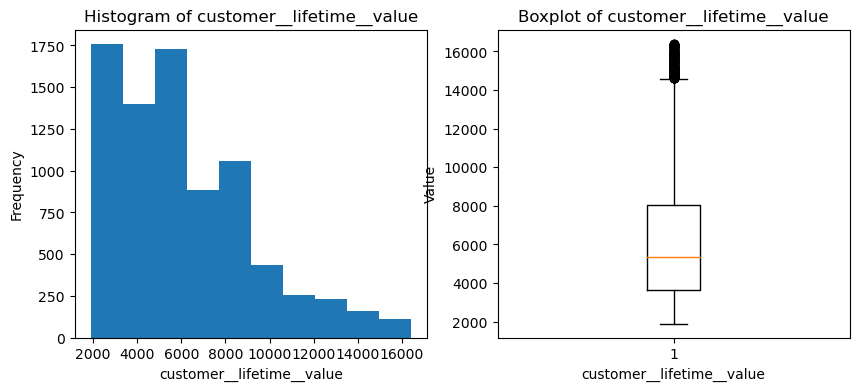

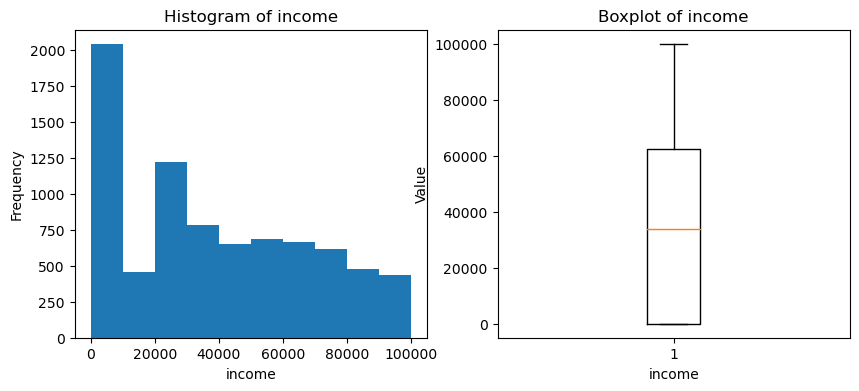

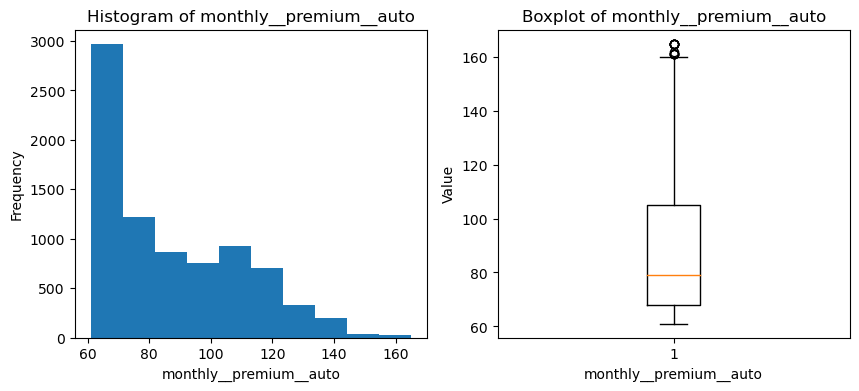

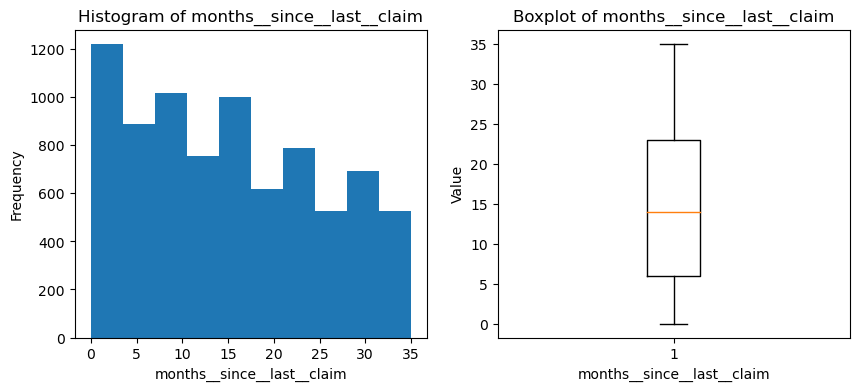

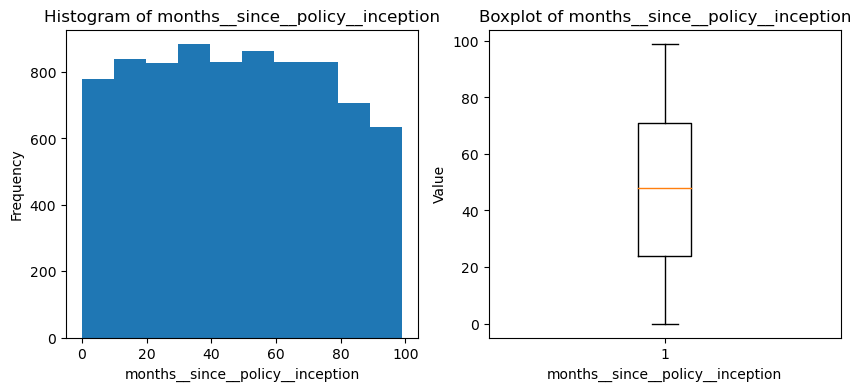

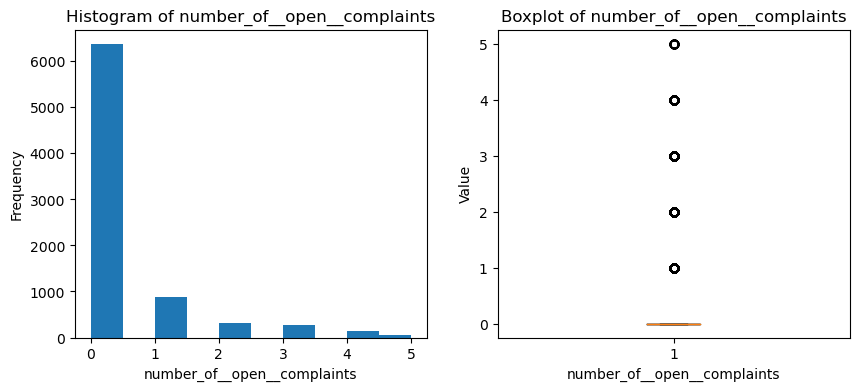

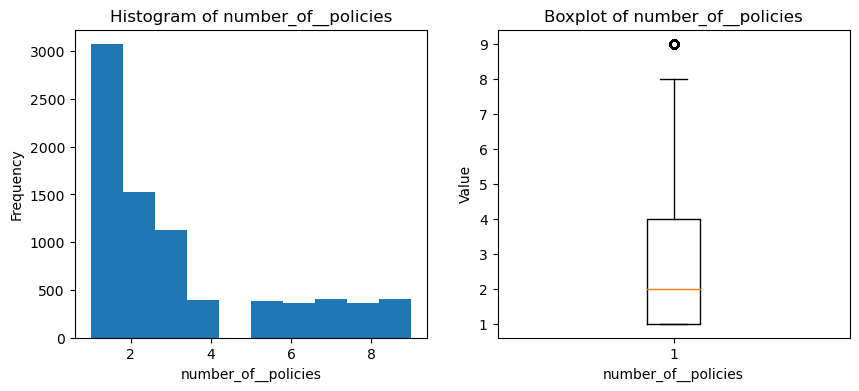

In [101]:
def plot_histboxplot(data):
    for col in data.columns:
        if data[col].dtype in ['int64', 'float64']:
            fig, ax = plt.subplots(1, 2, figsize=(10, 4))
            ax[0].hist(data[col], bins=10)
            ax[0].set_xlabel(col)
            ax[0].set_ylabel('Frequency')
            ax[0].set_title('Histogram of {}'.format(col))

            ax[1].boxplot(data[col])
            ax[1].set_xlabel(col)
            ax[1].set_ylabel('Value')
            ax[1].set_title('Boxplot of {}'.format(col))

            plt.show()
            
plot_histboxplot(data)

In [102]:
data_wrangling = data.to_csv('data_wrangling.csv', index=False)

In [103]:
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = object)

In [105]:
discrete_columns = []
continuous_columns = []

for col in numerical.columns:
    if numerical[col].nunique() <= 20:
        discrete_columns.append(col)
    else:
        continuous_columns.append(col)

In [106]:
continuous_numerical = numerical[continuous_columns].reset_index()
continuous_numerical

,level_0,index,customer__lifetime__value,income,monthly__premium__auto,months__since__last__claim,months__since__policy__inception
0,0,0,2763.519279,56274,69,32,5
1,1,1,6979.535903,0,94,13,42
2,2,2,12887.431650,48767,108,18,38
3,3,3,7645.861827,0,106,18,65
4,4,4,2813.692575,43836,73,12,44
...,...,...,...,...,...,...,...
8011,8011,9128,4100.398533,47761,104,16,58
8012,8012,9130,3096.511217,21604,79,14,28
8013,8013,9131,8163.890428,0,85,9,37
8014,8014,9132,7524.442436,21941,96,34,3


In [107]:
discrete_numerical = numerical[discrete_columns].reset_index()
discrete_numerical

,index,number_of__open__complaints,number_of__policies
0,0,0,1
1,1,0,8
2,2,0,2
3,3,0,7
4,4,0,1
...,...,...,...
8011,8011,0,1
8012,8012,0,1
8013,8013,3,2
8014,8014,0,3


In [110]:
transformer = MinMaxScaler().fit(continuous_numerical)
continuous_normalizer = transformer.transform(continuous_numerical)
continuous_normalizer = pd.DataFrame(continuous_normalizer)
continuous_normalizer.columns = continuous_numerical.columns
continuous_normalizer

,level_0,index,customer__lifetime__value,income,monthly__premium__auto,months__since__last__claim,months__since__policy__inception
0,0.000000,0.000000,0.059651,0.562847,0.076923,0.914286,0.050505
1,0.000125,0.000109,0.350217,0.000000,0.317308,0.371429,0.424242
2,0.000250,0.000219,0.757387,0.487763,0.451923,0.514286,0.383838
3,0.000374,0.000328,0.396140,0.000000,0.432692,0.514286,0.656566
4,0.000499,0.000438,0.063109,0.438443,0.115385,0.342857,0.444444
...,...,...,...,...,...,...,...
8011,0.999501,0.999453,0.151788,0.477701,0.413462,0.457143,0.585859
8012,0.999626,0.999672,0.082600,0.216081,0.173077,0.400000,0.282828
8013,0.999750,0.999781,0.431842,0.000000,0.230769,0.257143,0.373737
8014,0.999875,0.999891,0.387772,0.219452,0.336538,0.971429,0.030303


In [111]:
numerical = pd.concat([continuous_normalizer, discrete_numerical], axis=1)

In [113]:
onehot_encoder = []

for col in categorical.columns:
    col_uniques = sorted(categorical[col].astype(str).unique())
    for unique in col_uniques:
        onehot_encoder.append(col+"_"+unique)
        
categorical = pd.DataFrame(OneHotEncoder().fit_transform(categorical.astype(str)).toarray())
categorical.columns = onehot_encoder

In [116]:
X = pd.concat([categorical,numerical], axis=1)
X

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,level_0,index,customer__lifetime__value,income,monthly__premium__auto,months__since__last__claim,months__since__policy__inception,index,number_of__open__complaints,number_of__policies
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.059651,0.562847,0.076923,0.914286,0.050505,0,0,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000125,0.000109,0.350217,0.000000,0.317308,0.371429,0.424242,1,0,8
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.000250,0.000219,0.757387,0.487763,0.451923,0.514286,0.383838,2,0,2
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.000374,0.000328,0.396140,0.000000,0.432692,0.514286,0.656566,3,0,7
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.000499,0.000438,0.063109,0.438443,0.115385,0.342857,0.444444,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.999501,0.999453,0.151788,0.477701,0.413462,0.457143,0.585859,8011,0,1
8012,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.999626,0.999672,0.082600,0.216081,0.173077,0.400000,0.282828,8012,0,1
8013,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.999750,0.999781,0.431842,0.000000,0.230769,0.257143,0.373737,8013,3,2
8014,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.999875,0.999891,0.387772,0.219452,0.336538,0.971429,0.030303,8014,0,3


In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [120]:
model = sm.OLS(y_train,X_train).fit()

In [121]:
predictions = model.predict(X_test)

In [122]:
r2 = r2_score(y_test,predictions)

In [123]:
r2

0.7476607856259385